In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1998.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1998,17502,414,31,3549
1,1998,17345,136,35,3537
2,1998,17906,137,34,3531
3,1998,17665,326,13,3513
4,1998,18001,113,42,3501
...,...,...,...,...,...
1843,1998,17778,418,14,3525
1844,1998,17376,307,30,3554
1845,1998,17065,91,20,3513
1846,1998,18005,308,39,3515


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1848, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1848 non-null   int64
 1   Maximum length (m))  1848 non-null   int64
 2   Recession(m),        1848 non-null   int64
 3   Rate/yr(m)           1848 non-null   int64
 4   Snout altitude (m)   1848 non-null   int64
dtypes: int64(5)
memory usage: 72.3 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1848


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1998,17502,414,31,3549
1,1998,17345,136,35,3537
2,1998,17906,137,34,3531
3,1998,17665,326,13,3513
4,1998,18001,113,42,3501


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0268,0.0195,0.0217
"Recession(m),",NaN,-0.0268,1.0000,0.0491,-0.0330
Rate/yr(m),NaN,0.0195,0.0491,1.0000,-0.0395
Snout altitude (m),NaN,0.0217,-0.0330,-0.0395,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0217
Rate/yr(m)             0.0195
Recession(m),         -0.0268
Year                      NaN
Name: Maximum length (m)), dtype: float64

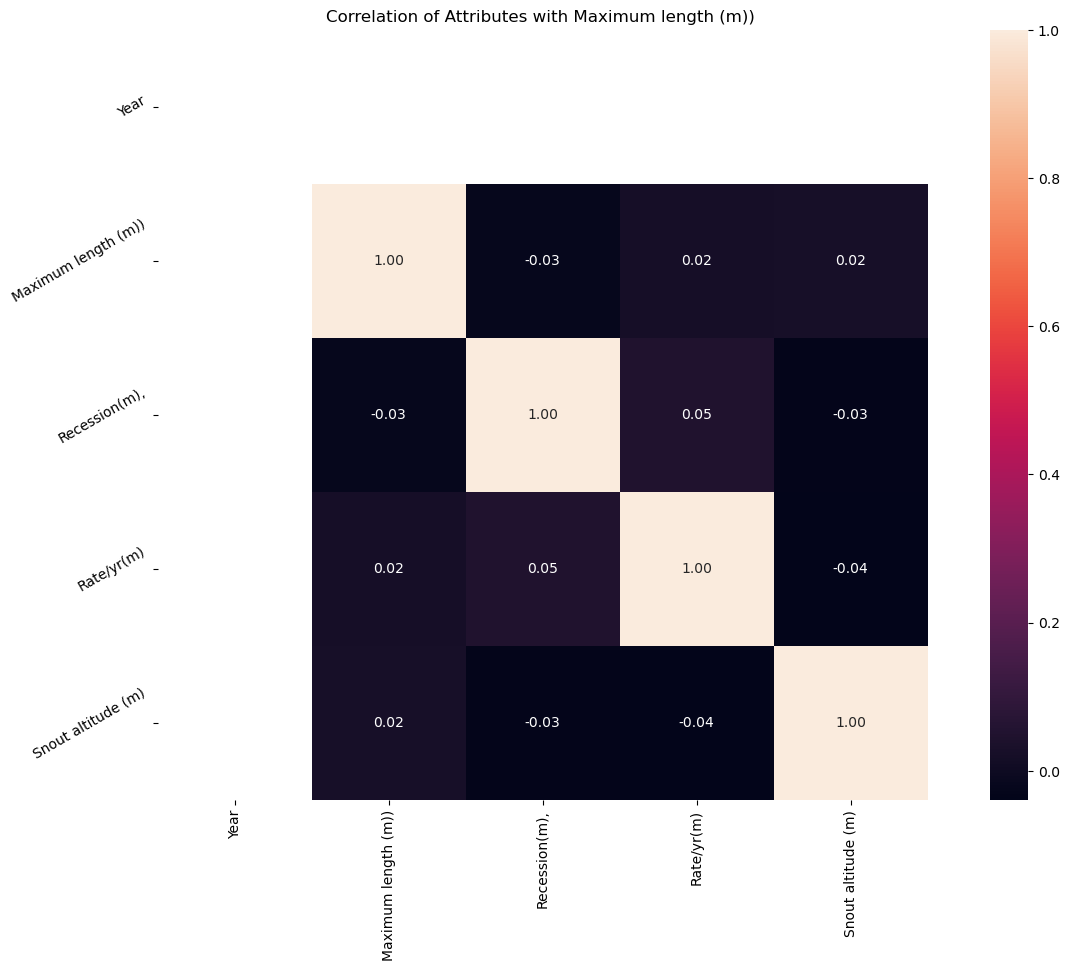

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,848.0000","1,848.0000","1,848.0000","1,848.0000","1,848.0000"
mean,"1,998.0000","17,544.9026",225.8506,27.3718,"3,532.3696"
std,0.0000,299.7406,128.1364,8.6565,20.2437
min,"1,998.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,998.0000","17,278.0000",114.0000,20.0000,"3,515.0000"
50%,"1,998.0000","17,546.0000",227.0000,28.0000,"3,533.0000"
75%,"1,998.0000","17,802.0000",338.0000,35.0000,"3,550.0000"
max,"1,998.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1998,17502,414,31,3549
1,1998,17345,136,35,3537
2,1998,17906,137,34,3531
3,1998,17665,326,13,3513
4,1998,18001,113,42,3501


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

1998   1.0000
Name: Year, dtype: float64

180   0.0054
113   0.0054
377   0.0054
278   0.0054
131   0.0054
       ...  
403   0.0005
358   0.0005
133   0.0005
208   0.0005
392   0.0005
Name: Recession(m),, Length: 435, dtype: float64

18   0.0406
38   0.0390
21   0.0384
34   0.0379
28   0.0373
32   0.0368
15   0.0363
13   0.0357
14   0.0357
29   0.0357
31   0.0352
37   0.0341
22   0.0341
23   0.0335
42   0.0335
33   0.0335
35   0.0335
17   0.0330
30   0.0330
36   0.0319
39   0.0314
27   0.0308
16   0.0308
24   0.0303
25   0.0303
19   0.0298
40   0.0281
20   0.0276
41   0.0271
26   0.0249
Name: Rate/yr(m), dtype: float64

3554   0.0195
3507   0.0184
3512   0.0179
3549   0.0173
3513   0.0173
        ...  
3511   0.0103
3518   0.0097
3514   0.0097
3566   0.0081
3496   0.0022
Name: Snout altitude (m), Length: 72, dtype: float64



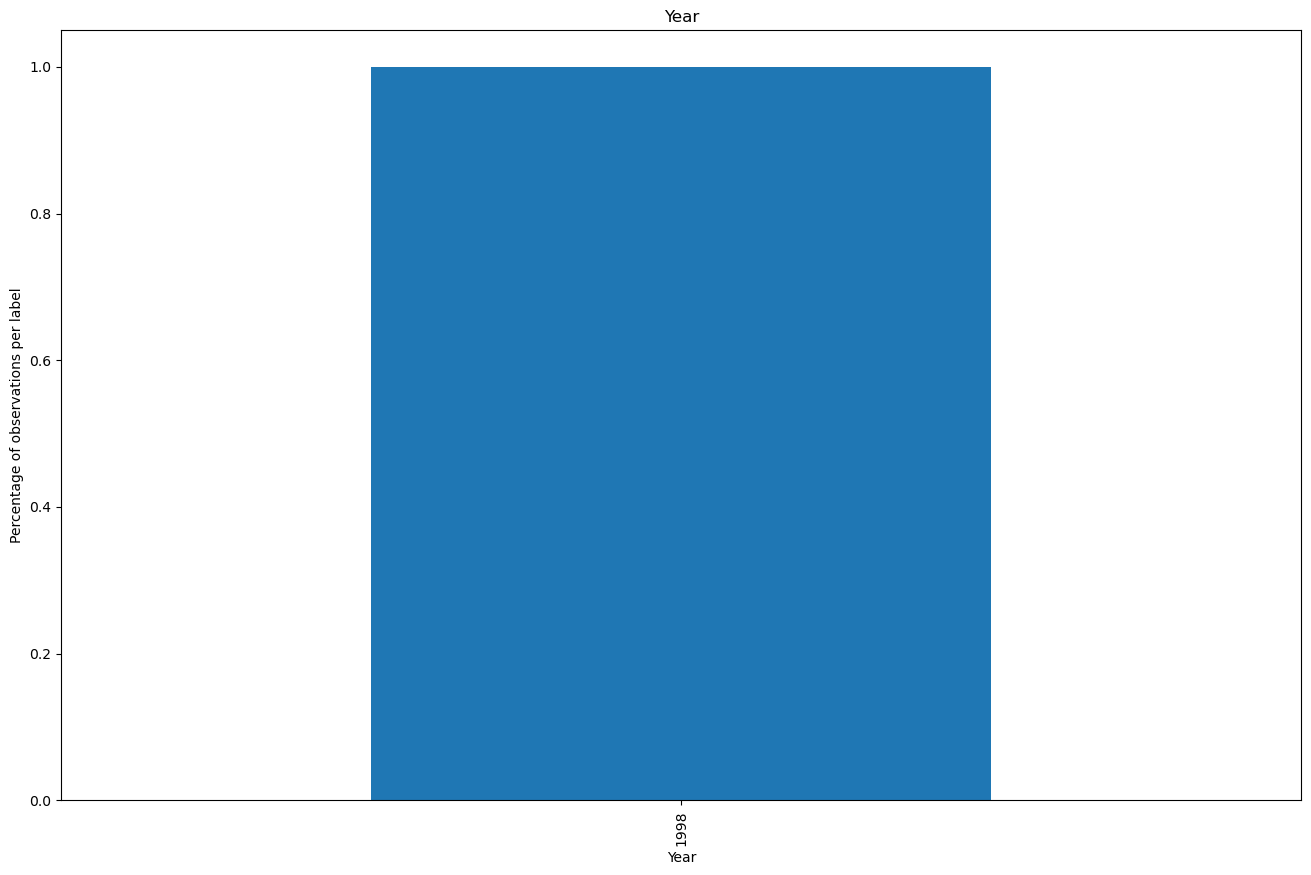

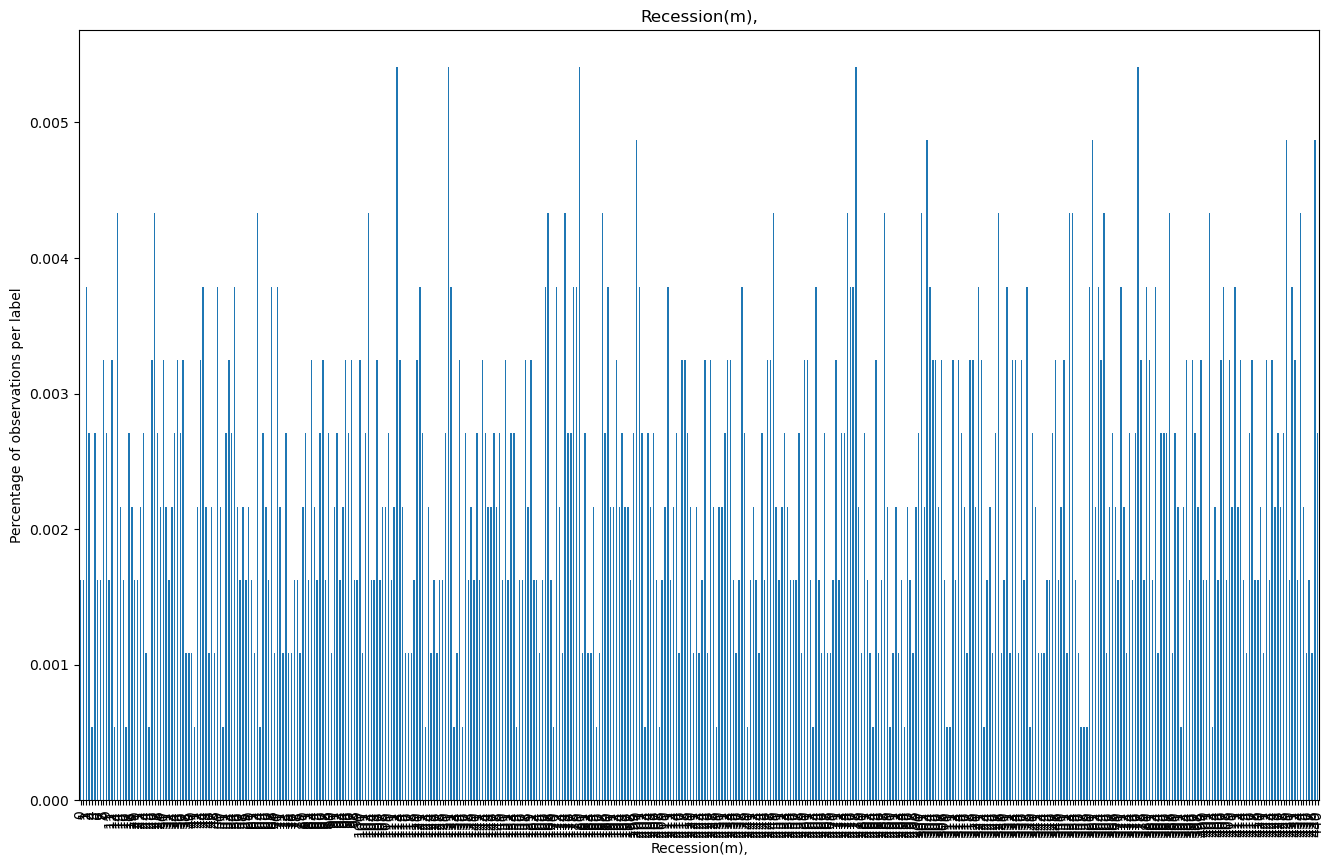

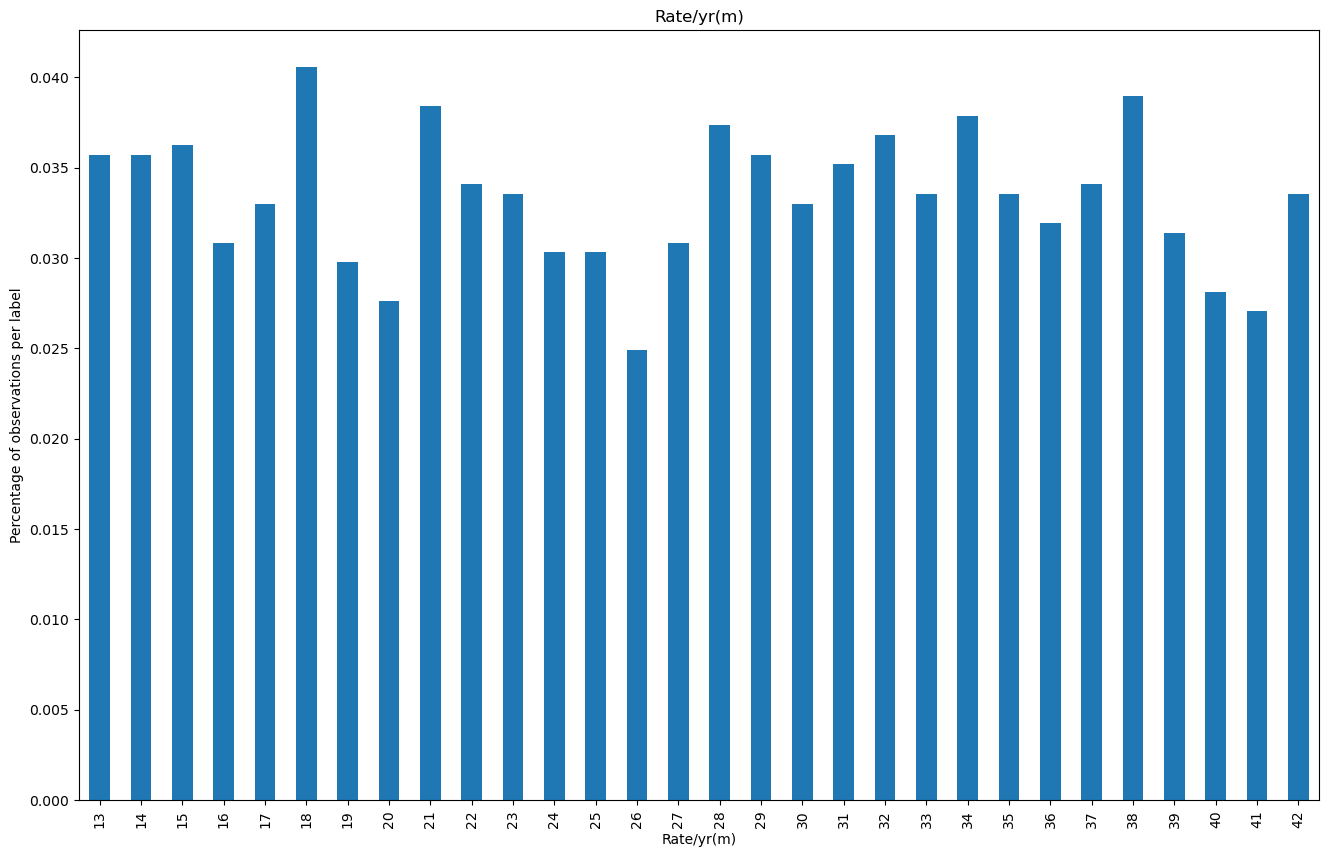

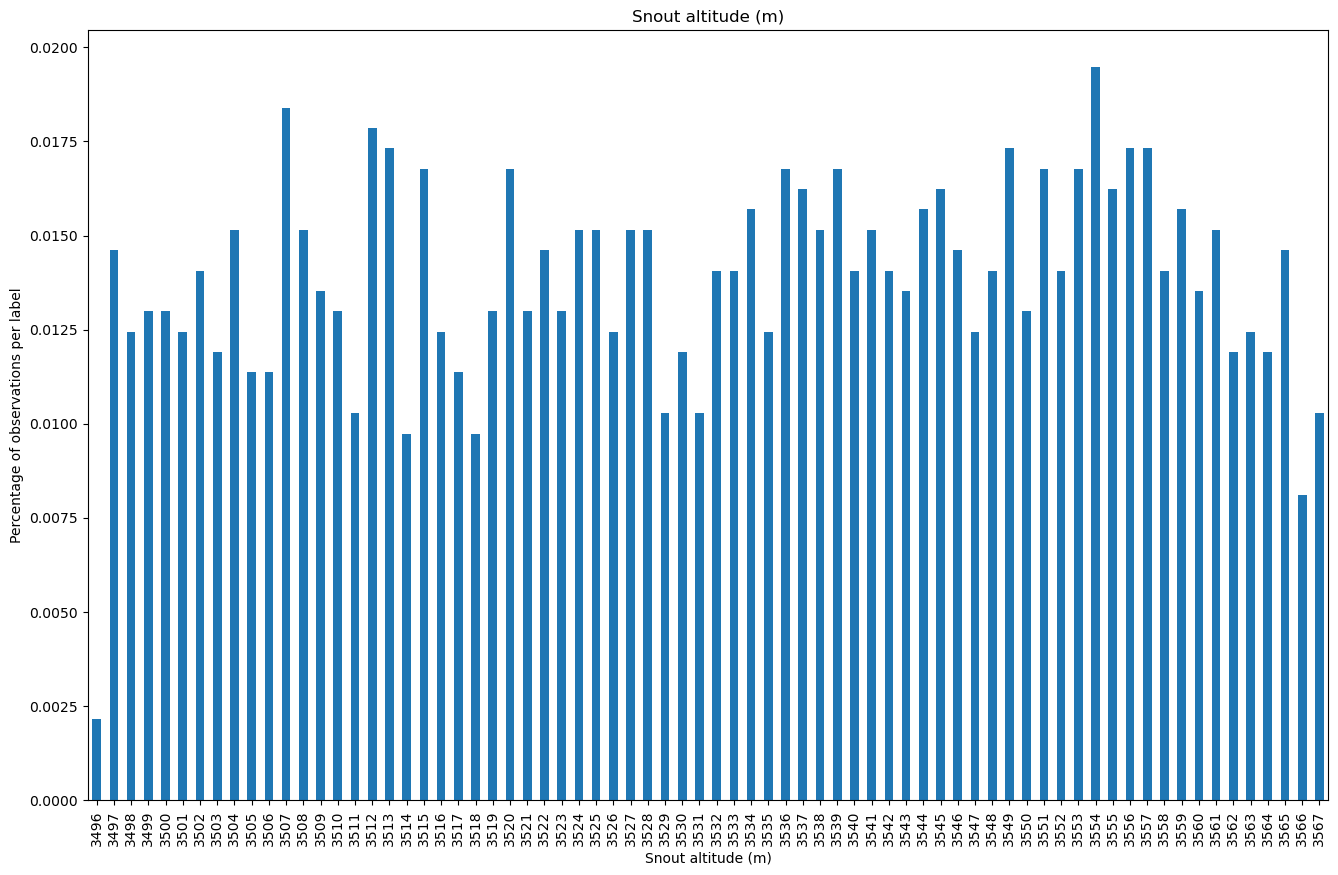

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()